# Progressive Resizing Experiment

Validating on fold 4 since that correlated best with Kaggle scores in baseline exp tests. Looking at baseline experiment:
- ~20 total epochs
- 1e-2 lr 

seems to fit a `resnet18` well.

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from plant_pathology.all import *

## Prep DataLoaders and Train & Repeat

### Train at 128

In [ ]:
dls = get_dls_all_in_1(presize=512, resize=128, bs=400); len(dls.train), len(dls.valid)

(3, 1)

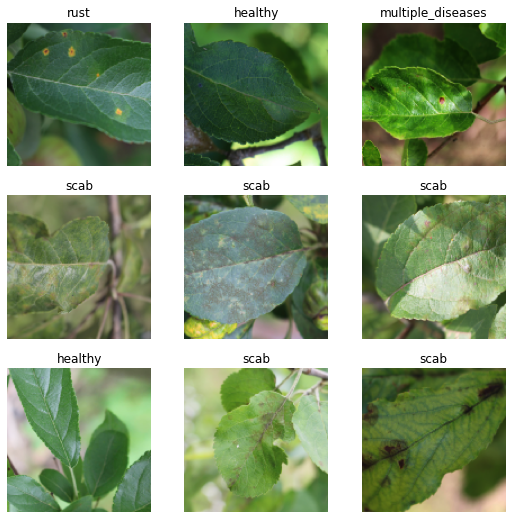

In [ ]:
dls.show_batch()

NameError: name 'exit' is not defined

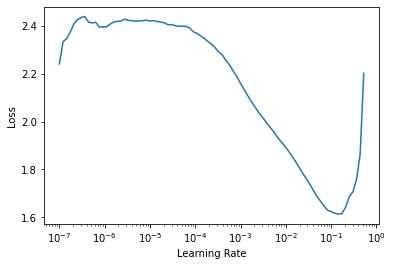

In [ ]:
train(16, "find", frz=4, dls=dls)

In [ ]:
learn = train(9, 2e-2, frz=3, dls=dls)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,1.848558,8.286249,0.467033,0.767209,00:43
1,1.470756,10.606029,0.543956,0.786458,00:43
2,1.232359,6.915078,0.552198,0.841750,00:43


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.580839,2.806997,0.730769,0.832137,00:43
1,0.549629,3.164518,0.758242,0.833921,00:44
2,0.517378,4.863543,0.596154,0.825528,00:44
3,0.500398,1.978106,0.815934,0.880631,00:43
4,0.474497,0.737250,0.903846,0.913655,00:43
5,0.443780,0.767734,0.898352,0.914129,00:43
6,0.416395,0.947176,0.865385,0.896689,00:43
7,0.388865,0.769286,0.868132,0.901102,00:44
8,0.364474,0.579508,0.881868,0.913097,00:44


## Train at 224

In [ ]:
dls = get_dls_all_in_1(presize=512, resize=224, bs=400); len(dls.train), len(dls.valid)

(3, 1)

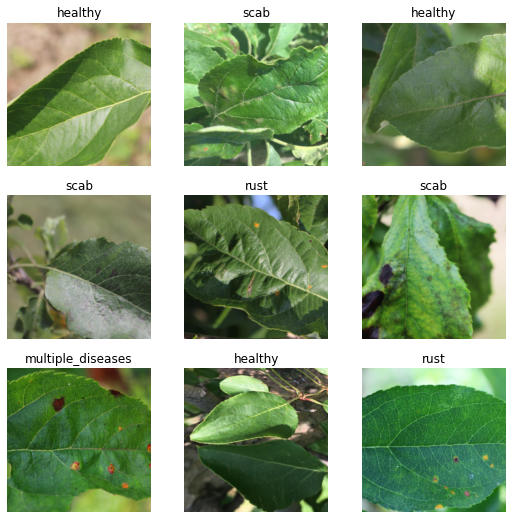

In [ ]:
dls.show_batch()

In [ ]:
learn.dls = dls

In [ ]:
learn.fine_tune(5, 1e-2, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.344322,0.784800,0.747253,0.908682,00:47
1,0.319537,0.865394,0.697802,0.908044,00:44
2,0.295397,0.453250,0.846154,0.935040,00:44


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.269038,0.466524,0.837912,0.940676,00:46
1,0.232888,0.403869,0.884615,0.937202,00:45
2,0.212567,0.393310,0.906593,0.928929,00:45
3,0.209866,0.362300,0.925824,0.916378,00:45
4,0.201481,0.344762,0.920330,0.923664,00:45


## Train at 400

In [ ]:
dls = get_dls_all_in_1(presize=512, resize=400, bs=128); len(dls.train), len(dls.valid)

(11, 3)

In [ ]:
dls.show_batch()

In [ ]:
learn.dls = dls

In [ ]:
learn.fine_tune(7, 6e-3, 2)

epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.146757,0.211817,0.950549,0.964789,00:31
1,0.158199,0.216580,0.953297,0.960688,00:30


epoch,train_loss,valid_loss,accuracy,roc_auc_score,time
0,0.130765,0.174794,0.958791,0.969538,00:30
1,0.136049,0.202865,0.953297,0.968416,00:31
2,0.140373,0.246253,0.950549,0.955154,00:30
3,0.154589,0.247764,0.942308,0.958679,00:30
4,0.140754,0.210603,0.956044,0.966828,00:30
5,0.128414,0.205128,0.947802,0.969076,00:30
6,0.119097,0.220951,0.956044,0.967991,00:30
7,0.116133,0.219888,0.953297,0.967672,00:31


## Evaluate 

In [ ]:
evaluate(learn, "sub2.csv")

Path('sub2.csv')

In [ ]:
kaggle_submit_command()

!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f {submission_path} -m 'hi'


In [ ]:
!kaggle competitions submit -c plant-pathology-2020-fgvc7 -f sub2.csv -m 'Progressive_resizing'

100%|████████████████████████████████████████| 105k/105k [00:02<00:00, 43.3kB/s]
Successfully submitted to Plant Pathology 2020 - FGVC7